In [292]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

C:\Users\swaroop.padala\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [236]:
import pandas as pd
dataset = pd.read_csv('Train.csv')

In [237]:
dataset.values

array([['2012-10-02 09:00:00', 'None', 121, ..., 'Clouds',
        'scattered clouds', 5545],
       ['2012-10-02 10:00:00', 'None', 178, ..., 'Clouds',
        'broken clouds', 4516],
       ['2012-10-02 11:00:00', 'None', 113, ..., 'Clouds',
        'overcast clouds', 4767],
       ...,
       ['2017-05-17 22:00:00', 'None', 138, ..., 'Mist', 'mist', 2194],
       ['2017-05-17 23:00:00', 'None', 229, ..., 'Rain',
        'heavy intensity rain', 1328],
       ['2017-05-17 23:00:00', 'None', 140, ..., 'Mist', 'mist', 1328]],
      dtype=object)

In [238]:
data = dataset
data["date_time"]= pd.to_datetime(data["date_time"]) 

In [239]:

ds = dataset
ds.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null datetime64[ns]
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8), object(3)
memory usage: 3.9+ MB


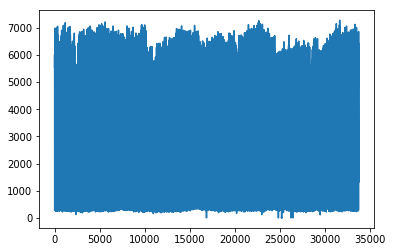

In [241]:
from matplotlib import pyplot
pyplot.plot(data.values[:, 14])
pyplot.show()

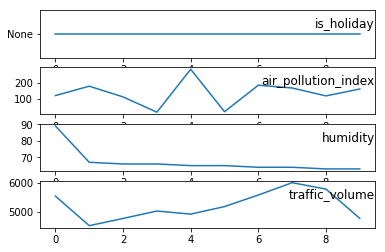

In [242]:
from matplotlib import pyplot
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
#values = dataset.values
# specify columns to plot
# groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14]
groups = [1, 2, 3, 14]
sub_ds = dataset[:10]
values = sub_ds.values
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(sub_ds.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [243]:
data.index = data['date_time']
data.describe()
data.loc['2014-08-8' : '2015-06-11'].head(100)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,,
2014-08-08 00:00:00,2014-08-08 00:00:00,None,137,69,3,333,5,5,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,2014-08-08 01:00:00,None,61,66,3,330,8,8,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,2015-06-11 20:00:00,None,282,65,3,327,5,5,287.586,0.0,0.0,92,Rain,light rain,2886


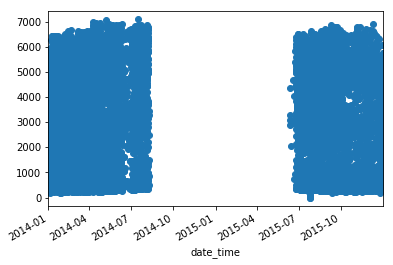

In [244]:
from matplotlib import pyplot as plt
sub_data = data.loc['2014-01-1' : '2015-12-31']
sub_data['traffic_volume'].plot(style='o')
plt.show()

In [245]:
data.drop(['date_time'], axis=1)

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
2012-10-02 14:00:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181
2012-10-02 15:00:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584
2012-10-02 16:00:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015
2012-10-02 17:00:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791


In [246]:
data = data.drop(['date_time'], axis=1)

In [247]:
data.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [250]:
test = data.copy()

In [251]:
test

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
2012-10-02 14:00:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181
2012-10-02 15:00:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584
2012-10-02 16:00:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015
2012-10-02 17:00:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791


In [252]:
from sklearn.preprocessing import LabelEncoder as le

In [255]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test.iloc[:, 12] = labelencoder.fit_transform(test.iloc[:, 12])

In [256]:
labelencoder1 = LabelEncoder()
test.iloc[:, 11] = labelencoder1.fit_transform(test.iloc[:, 11])

In [258]:
test['is_holiday'].value_counts()

None                         33707
Thanksgiving Day                 5
New Years Day                    5
Christmas Day                    5
Labor Day                        4
Veterans Day                     4
Columbus Day                     4
Washingtons Birthday             4
Memorial Day                     3
Independence Day                 3
State Fair                       3
Martin Luther King Jr Day        3
Name: is_holiday, dtype: int64

In [259]:
labels = test['is_holiday'].astype('category').cat.categories.tolist()
replace_map_comp = {'is_holiday' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'is_holiday': {'Christmas Day': 1, 'Columbus Day': 2, 'Independence Day': 3, 'Labor Day': 4, 'Martin Luther King Jr Day': 5, 'Memorial Day': 6, 'New Years Day': 7, 'None': 8, 'State Fair': 9, 'Thanksgiving Day': 10, 'Veterans Day': 11, 'Washingtons Birthday': 12}}


In [260]:
replace_map_comp['is_holiday']['None'] = 0

In [261]:
test.replace(replace_map_comp, inplace=True)

In [262]:
test['is_holiday'].value_counts()

0     33707
10        5
7         5
1         5
12        4
11        4
4         4
2         4
9         3
6         3
5         3
3         3
Name: is_holiday, dtype: int64

In [265]:
# convert series to supervised learning
from pandas import DataFrame, concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [266]:
from sklearn.preprocessing import MinMaxScaler
values = test.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

In [274]:
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(scaled.columns)
print(reframed.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)',
       'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)',
       'var14(t)'],
      dtype='object')


In [275]:
prepared_reframed = reframed.drop(reframed.columns[[14,15,16,17,18,19,20,21,22,23,24,25,26]], axis=1)

In [277]:
prepared_reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var14(t)'],
      dtype='object')

In [278]:
prepared_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var14(t)
1,0.0,0.384083,0.873563,0.1250,0.913889,0.000,0.000,0.935245,0.0,0.0,0.40,0.1,0.648649,0.761676,0.620330
2,0.0,0.581315,0.620690,0.1875,0.916667,0.000,0.000,0.938749,0.0,0.0,0.75,0.1,0.054054,0.620330,0.654808
3,0.0,0.356401,0.609195,0.1875,0.913889,0.125,0.125,0.939463,0.0,0.0,0.90,0.1,0.513514,0.654808,0.690385
4,0.0,0.034602,0.609195,0.1875,0.913889,0.500,0.500,0.941247,0.0,0.0,0.90,0.1,0.513514,0.690385,0.675550
5,0.0,0.937716,0.597701,0.1875,0.913889,0.750,0.750,0.944524,0.0,0.0,0.75,0.1,0.054054,0.675550,0.711676


In [280]:
prepared_reframed.count()

var1(t-1)     33749
var2(t-1)     33749
var3(t-1)     33749
var4(t-1)     33749
var5(t-1)     33749
var6(t-1)     33749
var7(t-1)     33749
var8(t-1)     33749
var9(t-1)     33749
var10(t-1)    33749
var11(t-1)    33749
var12(t-1)    33749
var13(t-1)    33749
var14(t-1)    33749
var14(t)      33749
dtype: int64

In [281]:
df = prepared_reframed.copy()
len(df)

33749

In [290]:
import math
train_percent = 60
train_len = math.ceil(len(df)*0.6)
train_len

20250

In [291]:
# split into train and test sets
values = df.values
n_train_hours = train_len
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(20250, 1, 14) (20250,) (13499, 1, 14) (13499,)


Train on 20250 samples, validate on 13499 samples
Epoch 1/50
 - 2s - loss: 0.1526 - val_loss: 0.0764
Epoch 2/50
 - 1s - loss: 0.0789 - val_loss: 0.0748
Epoch 3/50
 - 1s - loss: 0.0784 - val_loss: 0.0756
Epoch 4/50
 - 1s - loss: 0.0781 - val_loss: 0.0747
Epoch 5/50
 - 1s - loss: 0.0779 - val_loss: 0.0744
Epoch 6/50
 - 1s - loss: 0.0776 - val_loss: 0.0744
Epoch 7/50
 - 1s - loss: 0.0774 - val_loss: 0.0747
Epoch 8/50
 - 1s - loss: 0.0772 - val_loss: 0.0760
Epoch 9/50
 - 1s - loss: 0.0773 - val_loss: 0.0746
Epoch 10/50
 - 1s - loss: 0.0772 - val_loss: 0.0740
Epoch 11/50
 - 1s - loss: 0.0772 - val_loss: 0.0739
Epoch 12/50
 - 1s - loss: 0.0772 - val_loss: 0.0723
Epoch 13/50
 - 1s - loss: 0.0770 - val_loss: 0.0755
Epoch 14/50
 - 1s - loss: 0.0769 - val_loss: 0.0740
Epoch 15/50
 - 1s - loss: 0.0770 - val_loss: 0.0747
Epoch 16/50
 - 1s - loss: 0.0769 - val_loss: 0.0732
Epoch 17/50
 - 1s - loss: 0.0769 - val_loss: 0.0750
Epoch 18/50
 - 1s - loss: 0.0770 - val_loss: 0.0724
Epoch 19/50
 - 1s - los

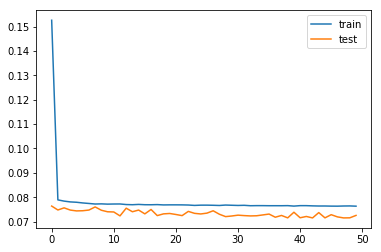

In [293]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [295]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.354


In [297]:
test_y

array([[0.0853022 ],
       [0.05247253],
       [0.04423077],
       ...,
       [0.30137363],
       [0.18241759],
       [0.18241759]], dtype=float32)